In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("owid-covid-data.csv")

# Inspect the dataset
print("Columns in dataset:", df.columns)
print("First few rows:", df.head())

# Check for missing values
print("Missing values count:", df.isnull().sum())

Columns in dataset: Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_

In [4]:
# Filtering for selected countries (Kenya, USA, India)
selected_countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(selected_countries)]

# Dropping rows with missing critical values
df_filtered = df_filtered.dropna(subset=['date', 'total_cases', 'total_deaths'])

# Convert 'date' column to datetime format
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Handling missing numeric values
df_filtered.ffill(inplace=True)  # Forward fill missing values

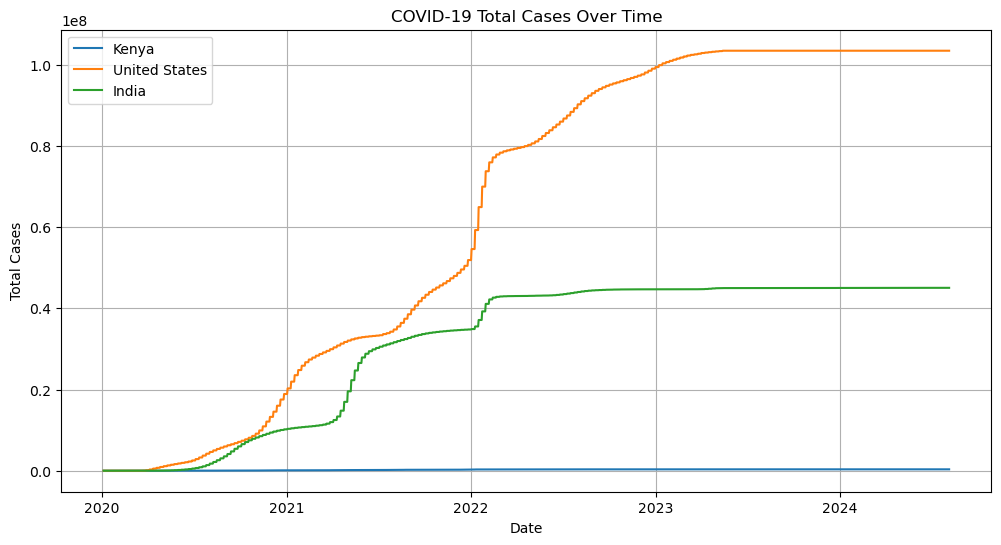

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total cases over time
plt.figure(figsize=(12,6))
for country in selected_countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title("COVID-19 Total Cases Over Time")
plt.legend()
plt.grid(True)
plt.show()

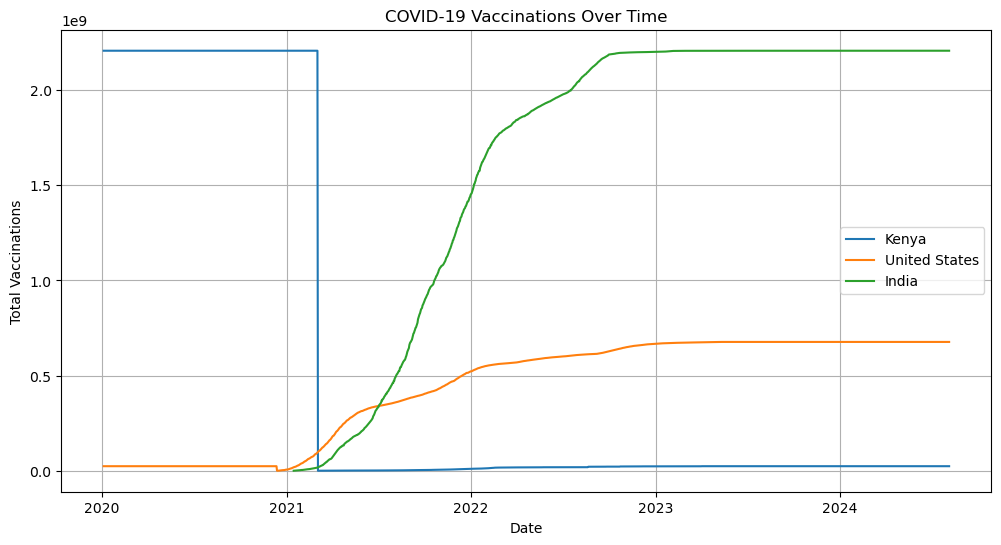

In [6]:
# Plot cumulative vaccinations over time
plt.figure(figsize=(12,6))
for country in selected_countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.title("COVID-19 Vaccinations Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import plotly.express as px

# Preparing latest data for visualization
latest_data = df_filtered[df_filtered['date'] == df_filtered['date'].max()]
fig = px.choropleth(latest_data, locations="iso_code", color="total_cases",
                    hover_name="location", title="COVID-19 Cases by Country")

fig.show()

In [10]:
import pandas as pd

# Load dataset
df = pd.read_csv("owid-covid-data.csv")
df['date'] = pd.to_datetime(df['date'])

# User inputs
user_country = input("Enter country name (e.g., Kenya, USA, India): ").strip()
start_date_str = input("Enter start date (YYYY-MM-DD): ").strip()
end_date_str = input("Enter end date (YYYY-MM-DD): ").strip()

# Convert inputs to datetime safely
try:
    start_date = pd.to_datetime(start_date_str, format="%Y-%m-%d", errors="coerce")
    end_date = pd.to_datetime(end_date_str, format="%Y-%m-%d", errors="coerce")

    if pd.isnull(start_date) or pd.isnull(end_date):
        raise ValueError("Invalid date format. Please enter dates in YYYY-MM-DD format.")
except ValueError as e:
    print(e)
    exit()

# Filter data based on user input
df_filtered = df[(df['location'] == user_country) & (df['date'] >= start_date) & (df['date'] <= end_date)]

# Display filtered results
print(df_filtered.head())

Enter country name (e.g., Kenya, USA, India):  South Africa
Enter start date (YYYY-MM-DD):  2020-05-05
Enter end date (YYYY-MM-DD):  2021-05-05


       iso_code continent      location       date  total_cases  new_cases  \
356011      ZAF    Africa  South Africa 2020-05-05       6336.0        0.0   
356012      ZAF    Africa  South Africa 2020-05-06       6336.0        0.0   
356013      ZAF    Africa  South Africa 2020-05-07       6336.0        0.0   
356014      ZAF    Africa  South Africa 2020-05-08       6336.0        0.0   
356015      ZAF    Africa  South Africa 2020-05-09       6336.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
356011              282.14         123.0         0.0                 5.29   
356012              282.14         123.0         0.0                 5.29   
356013              282.14         123.0         0.0                 5.29   
356014              282.14         123.0         0.0                 5.29   
356015              282.14         123.0         0.0                 5.29   

        ...  male_smokers  handwashing_facilities  hospital_beds_per

Enter country name (Valid options: Afghanistan, Africa, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antigua and Barbuda, Argentina...):  Africa
Enter start date (YYYY-MM-DD):  2020-05-05
Enter end date (YYYY-MM-DD):  2021-05-05


      iso_code  continent location       date  total_cases  new_cases  \
1795  OWID_AFR        NaN   Africa 2020-05-05      44003.0        0.0   
1796  OWID_AFR        NaN   Africa 2020-05-06      44003.0        0.0   
1797  OWID_AFR        NaN   Africa 2020-05-07      44003.0        0.0   
1798  OWID_AFR        NaN   Africa 2020-05-08      44003.0        0.0   
1799  OWID_AFR        NaN   Africa 2020-05-09      44003.0        0.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
1795             1811.57        2151.0         0.0                55.14  ...   
1796             1811.57        2151.0         0.0                55.14  ...   
1797             1811.57        2151.0         0.0                55.14  ...   
1798             1811.57        2151.0         0.0                55.14  ...   
1799             1811.57        2151.0         0.0                55.14  ...   

      male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
1795  

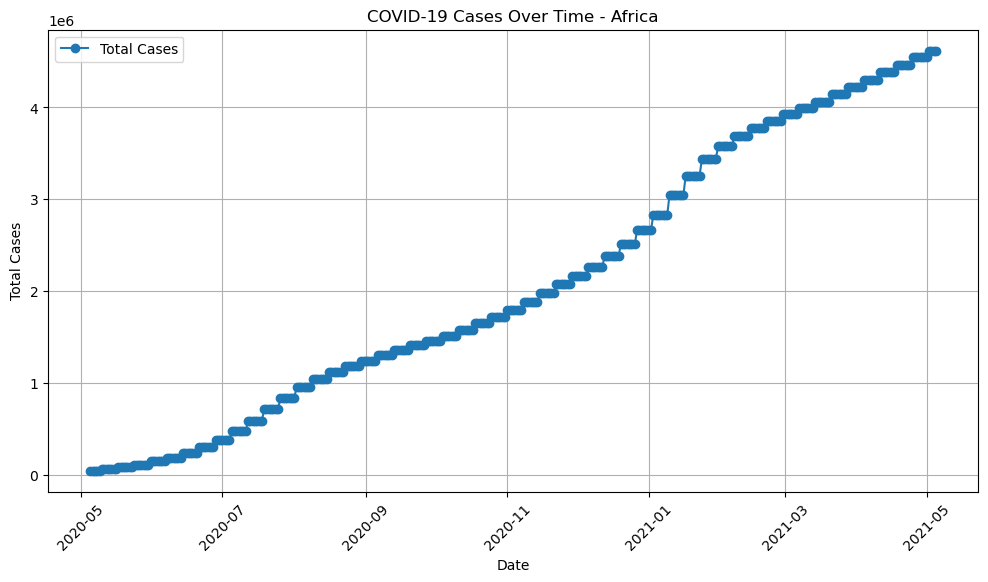

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("owid-covid-data.csv")

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Allow all valid country names dynamically
valid_countries = df['location'].unique().tolist()

# User selects a country
user_country = input(f"Enter country name (Valid options: {', '.join(valid_countries[:10])}...): ").strip()

# Validate input country
if user_country not in valid_countries:
    print("Invalid country! Please enter a valid country name.")
    exit()

# Get user date input
start_date_str = input("Enter start date (YYYY-MM-DD): ").strip()
end_date_str = input("Enter end date (YYYY-MM-DD): ").strip()

# Convert inputs to datetime safely
try:
    start_date = pd.to_datetime(start_date_str, format="%Y-%m-%d", errors="coerce")
    end_date = pd.to_datetime(end_date_str, format="%Y-%m-%d", errors="coerce")

    if pd.isnull(start_date) or pd.isnull(end_date):
        raise ValueError("Invalid date format. Please enter dates in YYYY-MM-DD format.")
except ValueError as e:
    print(e)
    exit()

# Filter data safely
df_filtered = df[df['location'] == user_country].copy()

# Handle missing values correctly
df_filtered.ffill(inplace=True)  # Forward fill missing values

# Apply date filters
df_user = df_filtered[(df_filtered['date'] >= start_date) & (df_filtered['date'] <= end_date)]

# Check if filtered data exists
if df_user.empty:
    print(f"No data found for {user_country} in the selected date range.")
    exit()

# Display first few rows of filtered data
print(df_user.head())

# Plot total cases over time
plt.figure(figsize=(12, 6))
plt.plot(df_user['date'], df_user['total_cases'], marker='o', linestyle='-', label="Total Cases")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title(f"COVID-19 Cases Over Time - {user_country}")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

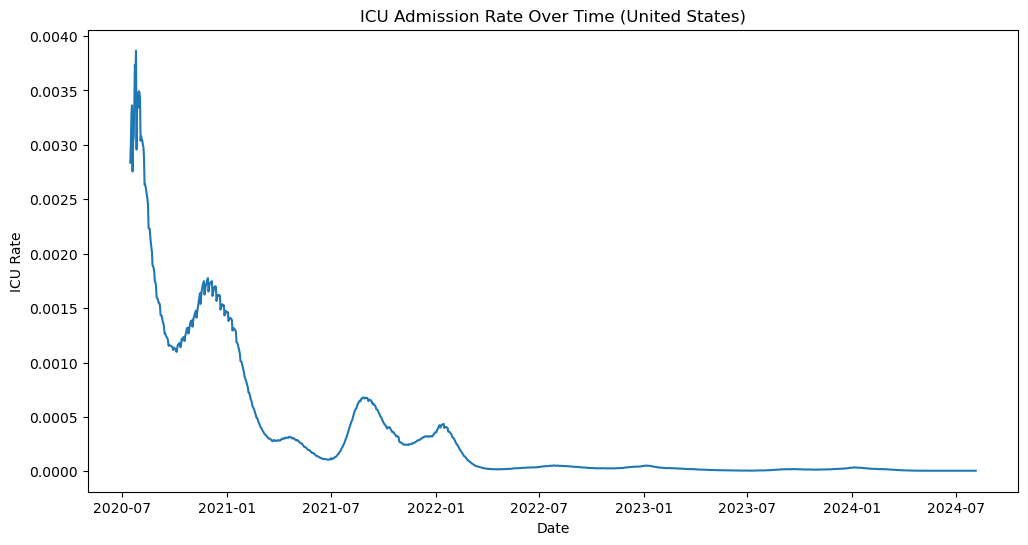

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("owid-covid-data.csv")
df['date'] = pd.to_datetime(df['date'])

# Define country (ensure 'user_country' is set)
user_country = "United States"  # Example

# Filter data
df_filtered = df[df['location'] == user_country].copy()
df_filtered.ffill(inplace=True)  # Handle missing values

# Check if ICU data exists before running calculations
if 'icu_patients' in df.columns:
    df_filtered['ICU Rate'] = df_filtered['icu_patients'] / df_filtered['total_cases']

    # Plot ICU rate over time
    plt.figure(figsize=(12, 6))
    plt.plot(df_filtered['date'], df_filtered['ICU Rate'])
    plt.xlabel("Date")
    plt.ylabel("ICU Rate")
    plt.title(f"ICU Admission Rate Over Time ({user_country})")
    plt.show()
else:
    print("ICU data is not available in this dataset.")